In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB2
# from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
model = load_model('mobilenetV2_softmax.h5')

In [3]:
path = '../video/far_filtered.avi'
cap = cv2.VideoCapture(path)
frame_array =[]
while(True):
    ret,frame = cap.read()
    
    if not ret:
        break
    cv2.imshow('frame',frame)
    frame_resized = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    frame_resized = cv2.resize(frame_resized, (224, 224)).astype("float32")
    frame_array.append(frame_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
frame_array = np.array(frame_array)

In [5]:
frame_array.shape


(2904, 224, 224, 3)

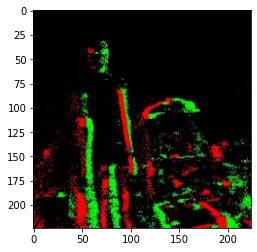

In [9]:
plt.imshow(frame_array[450]/255)

In [ ]:
# path = '../video/far_filtered'
# count = 0
# for i in range(frame_array.shape[0]):
#     cv2.imwrite(os.path.join(path,str(count)+'.png'),frame_array[i])
#     count += 1

In [6]:
test = preprocess_input(frame_array)

In [ ]:
# test_datagen = IDG(preprocessing_function=preprocess_input)
# test_generator = test_datagen.flow_from_directory('../video',batch_size=2904,target_size=(224,224),shuffle=False)

In [ ]:
# img_array = test_generator.next()

In [ ]:
# img_array =img_array[0]

In [ ]:
# img_array.shape

In [ ]:
# plt.imshow(img_array[470])

In [7]:
test_label = model.predict(test)

In [23]:
np.round(test_label[1160:1180,0]*100)

array([ 2.,  6., 11., 12., 22., 87., 14.,  4.,  1., 39., 10.,  1., 12.,
       25., 45., 18., 41., 48.,  0., 20.], dtype=float32)